In [5]:
import numpy as np
# from utils import *
import utils
import importlib
import matplotlib.pyplot as plt
import itertools
importlib.reload(utils)

<module 'utils' from '/home/yamamoto/Dropbox/study/montecarlo/qmc/utils.py'>

In [8]:
p = {'t': 0.5, 'J': 1.0, 'Hx': 10.0, 'L': 2,
     'M': 1000, 'ntot': 10, 'measure_interval': 1}
smc = utils.Mc(**p)
spins, Mzs, energys, tspins = smc.mc_sw()

(<Figure size 640x480 with 2 Axes>, <AxesSubplot: >)

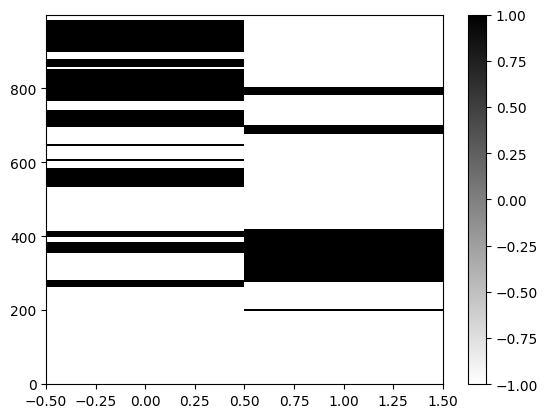

In [9]:
smc.plot_spins()

In [120]:
p = {'t': 1, 'J': 1.0, 'Hx': 10.0, 'L': 100,
     'M': 100, 'ntot': 100, 'measure_interval': 1}
ms = []
evars = []
Hxrange = 100
Hxmax = 2.0
Hxs = [Hxmax*i/Hxrange for i in range(Hxrange)]
for Hx in Hxs:
    p['Hx'] = Hx
    smc = utils.Mc(**p)
    spins, Mzs, energys, Hxspins = smc.mc_sw()
    ms.append(np.mean(np.abs(Mzs[energys.shape[0]//4:])))
    evars.append(np.var(energys[energys.shape[0]//4:]))

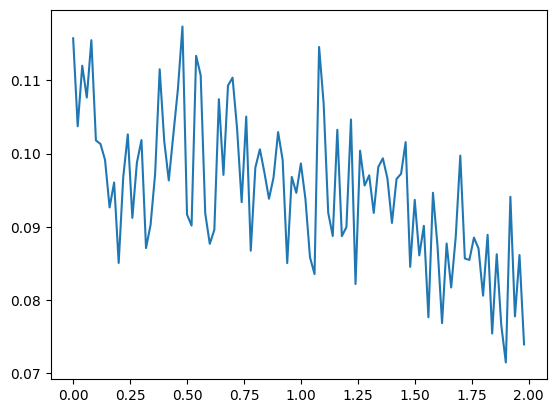

In [121]:
fig, ax = plt.subplots()
ax.plot(Hxs, ms)

In [124]:
p = {'t': 0.01, 'J': 1.0, 'Hx': 10.0, 'L': 100,
     'M': 100, 'ntot': 100, 'measure_interval': 1}
ms = []
evars = []
Hxrange = 50
Hxmax = 1.2
Hxs = [Hxmax*i/Hxrange for i in range(Hxrange)]
tmax = 0.5
trange = 50
ts = [0.01+tmax*i/trange for i in range(trange)]
for t in ts:
    ms_t = []
    evars_t = []
    for Hx in Hxs:
        p['Hx'] = Hx
        p['t'] = t
        smc = utils.Mc(**p)
        spins, Mzs, energys, Hxspins = smc.mc_sw()
        ms_t.append(np.mean(np.abs(Mzs[energys.shape[0]//4:])))
        evars_t.append(np.var(energys[energys.shape[0]//4:]))
    ms.append(ms_t)
    evars.append(evars_t)

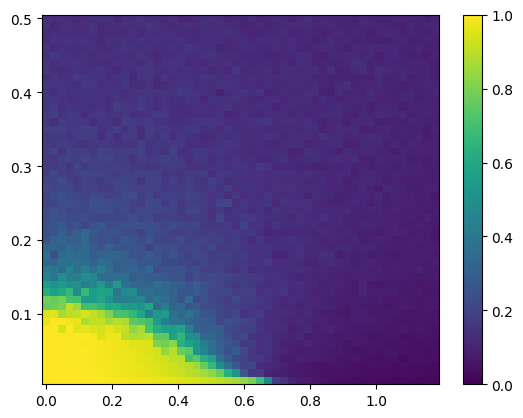

In [125]:
fig, ax = plt.subplots()
X, Y = np.meshgrid(Hxs, ts)
im = ax.pcolormesh(X, Y, ms, vmin=0, vmax=1)
fig.colorbar(im, ax=ax)

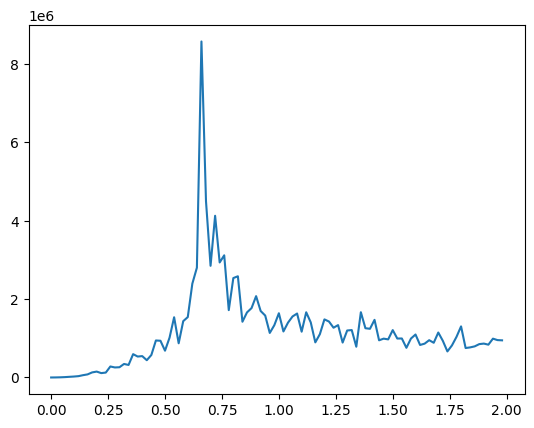

In [109]:
fig, ax = plt.subplots()
ax.plot(Hxs, evars)

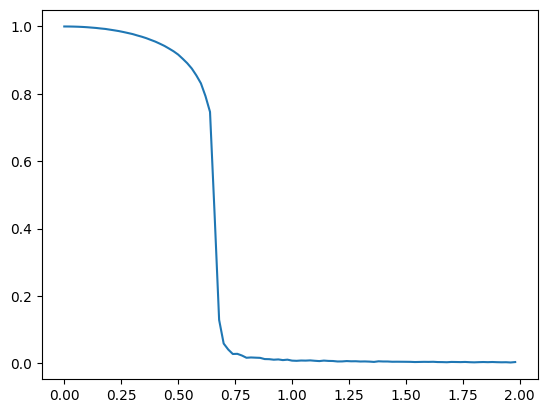

In [110]:
fig, ax = plt.subplots()
ax.plot(Hxs, ms)

In [2]:
p = {'t': 1, 'J': 1.0, 'L': 100, 'ntot': 100, 'measure_interval': 1}
ms = []
evars = []
trange = 100
tmax = 4.0
ts = [0.1+tmax*i/trange for i in range(trange)]
for t in ts:
    p['t'] = t
    smc = utils.Mc(**p)
    spins, Mzs, energys, tspins = smc.mc_sw()
    ms.append(np.mean(np.abs(Mzs[energys.shape[0]//4:])))
    evars.append(np.var(energys[energys.shape[0]//4:]))
    # ms.append(np.abs(np.mean(Mzs)))
    # evars.append(np.var(energys))

/home/yamamoto/.local/lib/python3.9/site-packages/numba/core/dispatcher.py:289: UserWarning: Numba extension module 'numba_dpex.numpy_usm_shared' failed to load due to 'ModuleNotFoundError(No module named 'llvmlite.llvmpy')'.
  entrypoints.init_all()


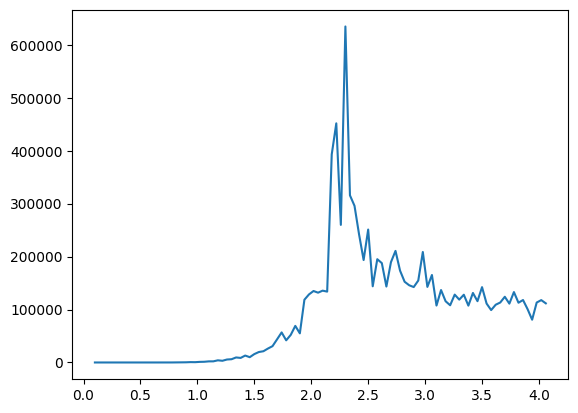

In [3]:
fig, ax = plt.subplots()
ax.plot(ts, evars)